# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [545]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import zscore

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Load the Data

In [546]:
df = pd.read_csv("Datasets/Traffic_Accidents.csv")

###  I will take a copy of the original dataframe to work with.

In [547]:
tr_df = df.copy()

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


### some information about the data.

In [548]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

### we can see that we have nulls in 4 columns.
### 'Accident_Severity'
### 'Number_of_Casualties'
### 'Light_Conditions'
### 'Urban_or_Rural_Area'
### I will fill the nulls using the simpe imputer later.

### let's see the head of the data

In [549]:
tr_df.head().T

0  \
Location_Easting_OSGR                                                     560530.0   
Location_Northing_OSGR                                                    103950.0   
Longitude                                                                 0.277298   
Latitude                                                                 50.812789   
Police_Force                                                                    47   
Accident_Severity                                                              3.0   
Number_of_Vehicles                                                               1   
Number_of_Casualties                                                           1.0   
Date                                                                    27/11/2009   
Day_of_Week                                                                      6   
Local_Authority_(District)                                                     556   
Local_Authority_(Highway)                                                E10000011   
1st_Road_Class                                                                   3   
1st_Road_Number                                                                 22   
Road_Type                                                         Dual carriageway   
Speed_limit                                                                     70   
2nd_Road_Class                                                                  -1   
2nd_Road_Number                                                                  0   
Pedestrian_Crossing-Human_Control                            None within 50 metres   
Pedestrian_Crossing-Physical_Facilities      No physical crossing within 50 meters   
Light_Conditions                                     Darkeness: No street lighting   
Weather_Conditions                                         Raining with high winds   
Road_Surface_Conditions                                  Flood (Over 3cm of water)   
Urban_or_Rural_Area                                                            2.0   
Did_Police_Officer_Attend_Scene_of_Accident                                    Yes   
Year                                                                          2009   

                                                                                   1  \
Location_Easting_OSGR                                                       508860.0   
Location_Northing_OSGR                                                      187170.0   
Longitude                                                                  -0.430574   
Latitude                                                                   51.572846   
Police_Force                                                                       1   
Accident_Severity                                                                3.0   
Number_of_Vehicles                                                                 2   
Number_of_Casualties                                                             1.0   
Date                                                                      10/10/2010   
Day_of_Week                                                                        1   
Local_Authority_(District)                                                        26   
Local_Authority_(Highway)                                                  E09000017   
1st_Road_Class                                                                     4   
1st_Road_Number                                                                  466   
Road_Type                                                         Single carriageway   
Speed_limit                                                                       30   
2nd_Road_Class                                                                     6   
2nd_Road_Number                                                                    0   
Pedestrian_Crossing-Human_Control                              None within 50 metres  

### summary statistics


In [550]:
tr_df.describe().T

count           mean            std  \
Location_Easting_OSGR       52000.0  440284.256846   95109.751221   
Location_Northing_OSGR      52000.0  299861.656788  161362.379650   
Longitude                   52000.0      -1.427193       1.398249   
Latitude                    52000.0      52.586684       1.453049   
Police_Force                52000.0      30.401712      25.545581   
Accident_Severity           51678.0       2.837145       0.402582   
Number_of_Vehicles          52000.0       1.834327       0.727856   
Number_of_Casualties        50959.0       1.354756       0.855220   
Day_of_Week                 52000.0       4.130712       1.926217   
Local_Authority_(District)  52000.0     349.542558     259.504721   
1st_Road_Class              52000.0       4.080519       1.428056   
1st_Road_Number             52000.0     997.078077    1806.405065   
Speed_limit                 52000.0      39.148558      14.212826   
2nd_Road_Class              52000.0       2.672673       3.205080   
2nd_Road_Number             52000.0     384.503058    1304.989395   
Urban_or_Rural_Area         51912.0       1.359397       0.479868   
Year                        52000.0    2009.401788       3.006997   

                                     min            25%            50%  \
Location_Easting_OSGR       98480.000000  375540.000000  440950.000000   
Location_Northing_OSGR      19030.000000  178010.000000  267180.000000   
Longitude                      -6.895268      -2.366190      -1.391202   
Latitude                       50.026153      51.487676      52.295042   
Police_Force                    1.000000       7.000000      30.000000   
Accident_Severity               1.000000       3.000000       3.000000   
Number_of_Vehicles              1.000000       1.000000       2.000000   
Number_of_Casualties            1.000000       1.000000       1.000000   
Day_of_Week                     1.000000       2.000000       4.000000   
Local_Authority_(District)      1.000000     112.000000     323.000000   
1st_Road_Class                  1.000000       3.000000       4.000000   
1st_Road_Number                 0.000000       0.000000     128.500000   
Speed_limit                    15.000000      30.000000      30.000000   
2nd_Road_Class                 -1.000000      -1.000000       3.000000   
2nd_Road_Number                -1.000000       0.000000       0.000000   
Urban_or_Rural_Area             1.000000       1.000000       1.000000   
Year                         2005.000000    2006.000000    2010.000000   

                                      75%           max  
Location_Easting_OSGR       523500.000000  6.549600e+05  
Location_Northing_OSGR      398149.250000  1.203900e+06  
Longitude                       -0.214666  1.753632e+00  
Latitude                        53.478016  6.071477e+01  
Police_Force                    46.000000  9.800000e+01  
Accident_Severity                3.000000  3.000000e+00  
Number_of_Vehicles               2.000000  3.400000e+01  
Number_of_Casualties             1.000000  5.100000e+01  
Day_of_Week                      6.000000  7.000000e+00  
Local_Authority_(District)     530.000000  9.410000e+02  
1st_Road_Class                   6.000000  6.000000e+00  
1st_Road_Number                716.000000  9.999000e+03  
Speed_limit                     50.000000  7.000000e+01  
2nd_Road_Class                   6.000000  6.000000e+00  
2nd_Road_Number                  0.000000  9.999000e+03  
Urban_or_Rural_Area              2.000000  3.000000e+00  
Year                          2012.000000  2.014000e+03

### let's foucs on the mean and std of the numerical columns so we spot potential outliers

In [551]:
tr_df.describe().T[['mean','std']]

mean            std
Location_Easting_OSGR       440284.256846   95109.751221
Location_Northing_OSGR      299861.656788  161362.379650
Longitude                       -1.427193       1.398249
Latitude                        52.586684       1.453049
Police_Force                    30.401712      25.545581
Accident_Severity                2.837145       0.402582
Number_of_Vehicles               1.834327       0.727856
Number_of_Casualties             1.354756       0.855220
Day_of_Week                      4.130712       1.926217
Local_Authority_(District)     349.542558     259.504721
1st_Road_Class                   4.080519       1.428056
1st_Road_Number                997.078077    1806.405065
Speed_limit                     39.148558      14.212826
2nd_Road_Class                   2.672673       3.205080
2nd_Road_Number                384.503058    1304.989395
Urban_or_Rural_Area              1.359397       0.479868
Year                          2009.401788       3.006997

### summery statistics for categorical columns


In [552]:
tr_df.describe(include='O').T

count unique  \
Date                                         52000   3286   
Local_Authority_(Highway)                    52000    206   
Road_Type                                    52000      6   
Pedestrian_Crossing-Human_Control            52000      3   
Pedestrian_Crossing-Physical_Facilities      52000      6   
Light_Conditions                             51456      5   
Weather_Conditions                           52000      9   
Road_Surface_Conditions                      52000      6   
Did_Police_Officer_Attend_Scene_of_Accident  52000      2   

                                                                               top  \
Date                                                                    04/11/2005   
Local_Authority_(Highway)                                                E10000016   
Road_Type                                                       Single carriageway   
Pedestrian_Crossing-Human_Control                            None within 50 metres   
Pedestrian_Crossing-Physical_Facilities      No physical crossing within 50 meters   
Light_Conditions                                    Daylight: Street light present   
Weather_Conditions                                         Fine without high winds   
Road_Surface_Conditions                                                        Dry   
Did_Police_Officer_Attend_Scene_of_Accident                                    Yes   

                                              freq  
Date                                            43  
Local_Authority_(Highway)                     1465  
Road_Type                                    38852  
Pedestrian_Crossing-Human_Control            51718  
Pedestrian_Crossing-Physical_Facilities      43368  
Light_Conditions                             37734  
Weather_Conditions                           41662  
Road_Surface_Conditions                      35727  
Did_Police_Officer_Attend_Scene_of_Accident  42143

### convert the Date column to datetime datatype in pandas

In [553]:
tr_df['Date'] = pd.to_datetime(df['Date'])

/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_6716/2119353083.py:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



<Axes: >

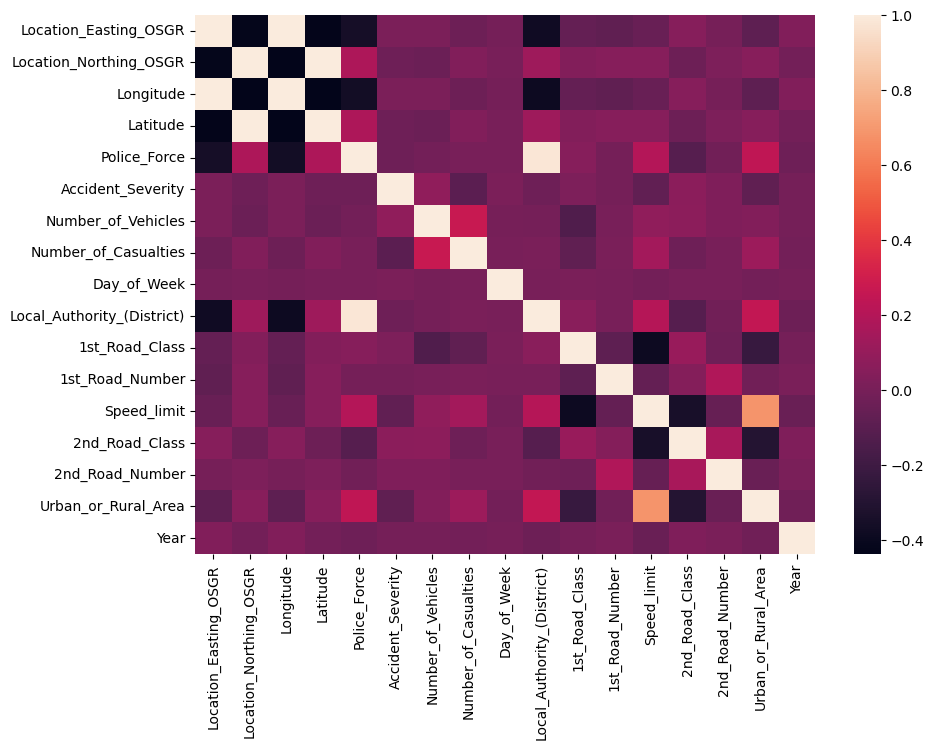

In [554]:
tr_df_corr = tr_df.corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(tr_df_corr)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

### function to handle outliers using zscore

In [555]:
def handle_outliers_zscore(df, threshold=3):
    z_scores = np.abs(zscore(df))
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    
    return df_no_outliers

## convert the selected features to dataframe.

In [556]:
features_df = tr_df[['Accident_Severity', 'Longitude', 'Latitude',
                     'Number_of_Vehicles', 'Number_of_Casualties',
                     'Road_Type','Weather_Conditions', 'Speed_limit','Year',
                      'Light_Conditions', 'Urban_or_Rural_Area']]
pd.DataFrame(features_df)

Accident_Severity  Longitude   Latitude  Number_of_Vehicles  \
0                    3.0   0.277298  50.812789                   1   
1                    3.0  -0.430574  51.572846                   2   
2                    3.0  -3.231459  51.414661                   2   
3                    3.0  -2.881800  53.568318                   1   
4                    3.0  -2.203020  53.047882                   2   
...                  ...        ...        ...                 ...   
51995                3.0  -0.888006  52.766777                   2   
51996                3.0  -1.192915  51.040030                   1   
51997                3.0   0.012032  51.252055                   3   
51998                3.0  -1.485264  52.902301                   2   
51999                3.0  -1.212104  51.565050                   3   

       Number_of_Casualties           Road_Type          Weather_Conditions  \
0                       1.0    Dual carriageway     Raining with high winds   
1                       1.0  Single carriageway     Fine without high winds   
2                       1.0  Single carriageway     Fine without high winds   
3                       2.0      One way street  Raining without high winds   
4                       2.0  Single carriageway     Fine without high winds   
...                     ...                 ...                         ...   
51995                   1.0  Single carriageway     Fine without high winds   
51996                   1.0  Single carriageway     Fine without high winds   
51997                   1.0  Single carriageway  Raining without high winds   
51998                   2.0  Single carriageway  Raining without high winds   
51999                   1.0  Single carriageway     Fine without high winds   

       Speed_limit  Year                         Light_Conditions  \
0               70  2009            Darkeness: No street lighting   
1               30  2010  Darkness: Street lights present and lit   
2               30  2005           Daylight: Street light present   
3               30  2007           Daylight: Street light present   
4               30  2013           Daylight: Street light present   
...            ...   ...                                      ...   
51995           30  2012           Daylight: Street light present   
51996           60  2013            Darkeness: No street lighting   
51997           40  2011           Daylight: Street light present   
51998           30  2011           Daylight: Street light present   
51999           60  2010           Daylight: Street light present   

       Urban_or_Rural_Area  
0                      2.0  
1                      1.0  
2                      1.0  
3                      1.0  
4                      1.0  
...                    ...  
51995                  1.0  
51996                  2.0  
51997                  1.0  
51998                  1.0  
51999                  2.0  

[52000 rows x 11 columns]

## correlation matrix for numerical features

<Axes: >

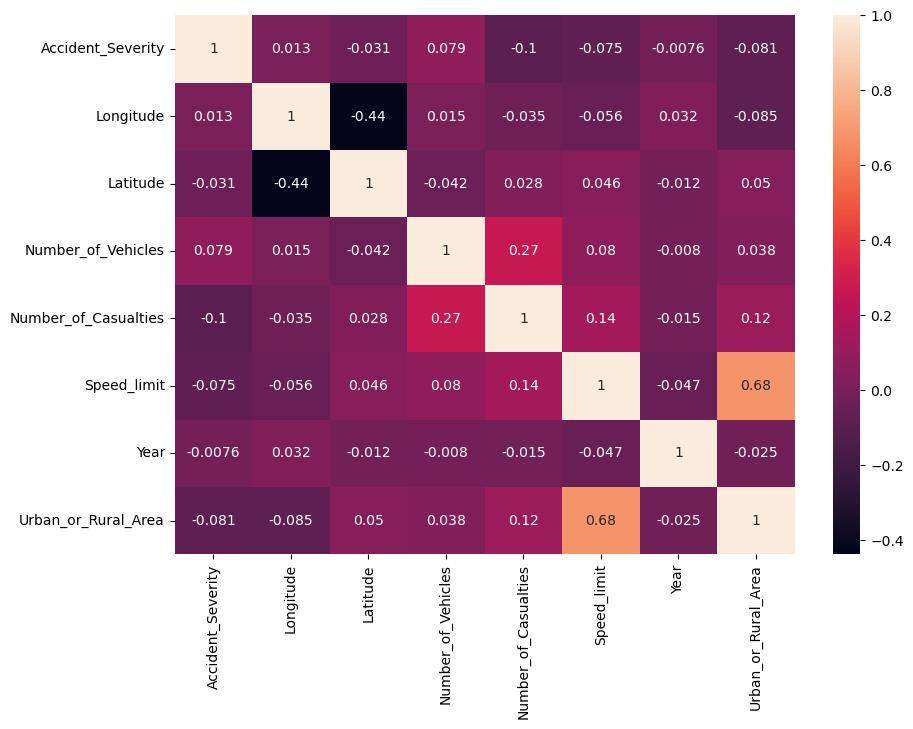

In [557]:
correlation_mat = features_df.corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(correlation_mat, annot=True)

### for loop to plot boxplot for all columns to check for outliers.

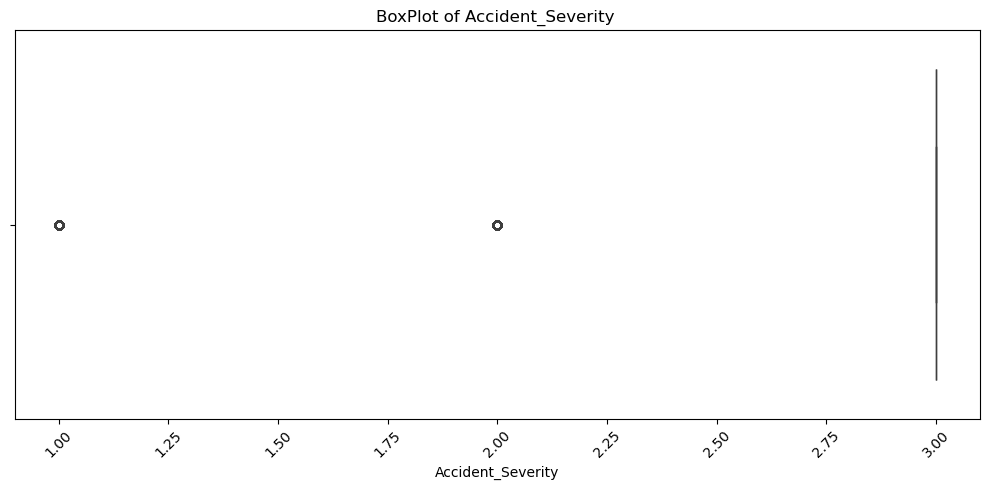

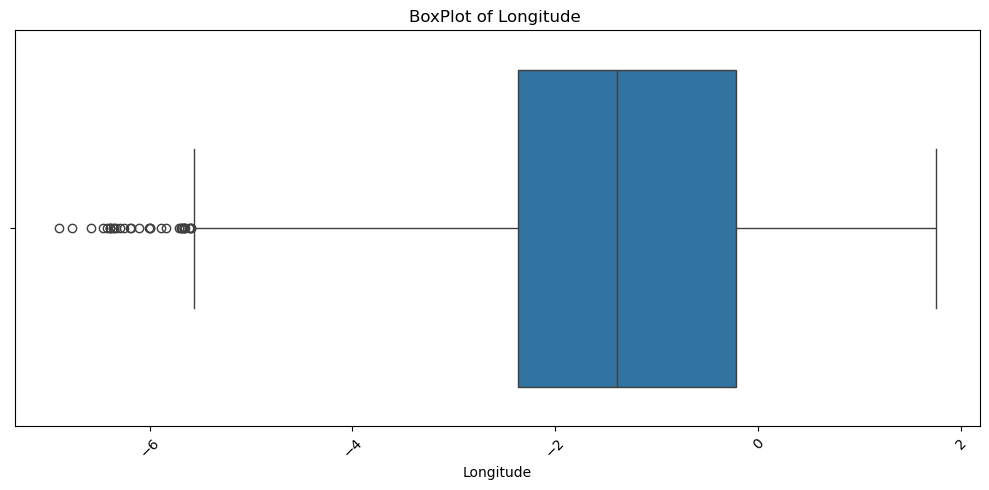

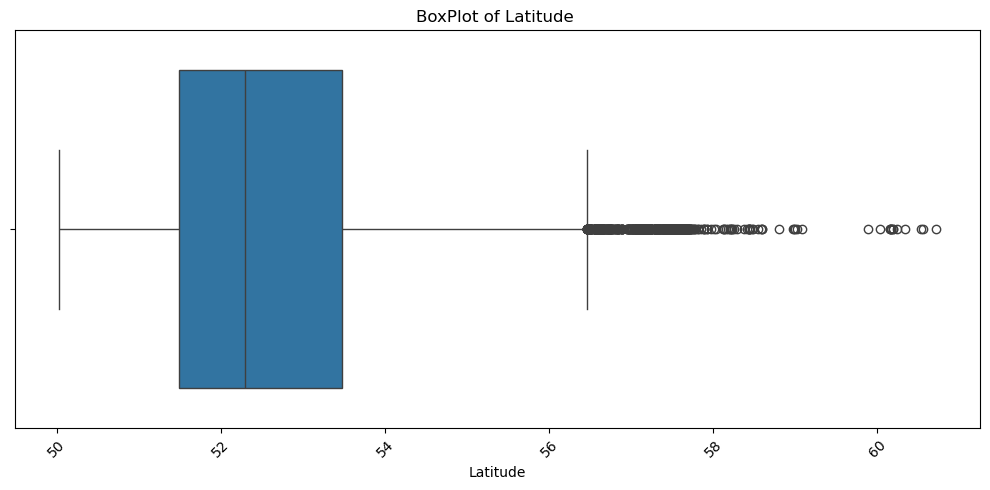

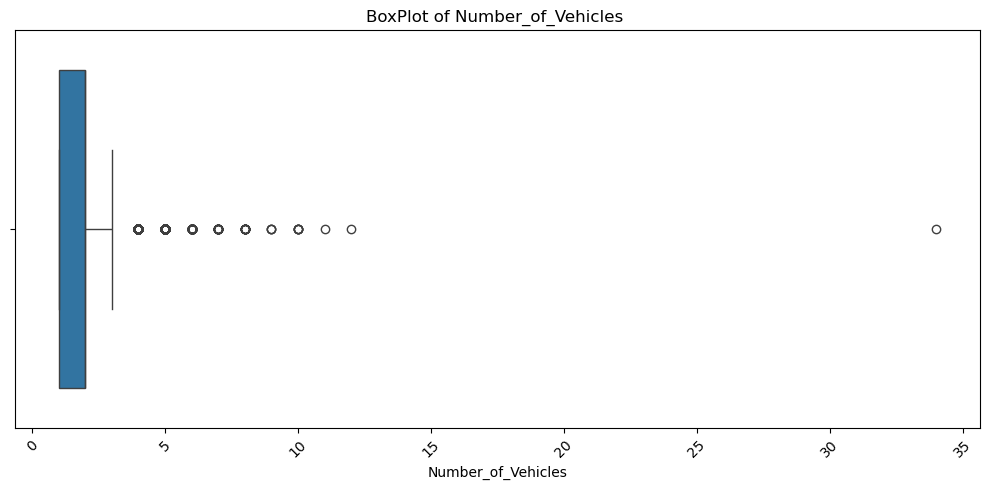

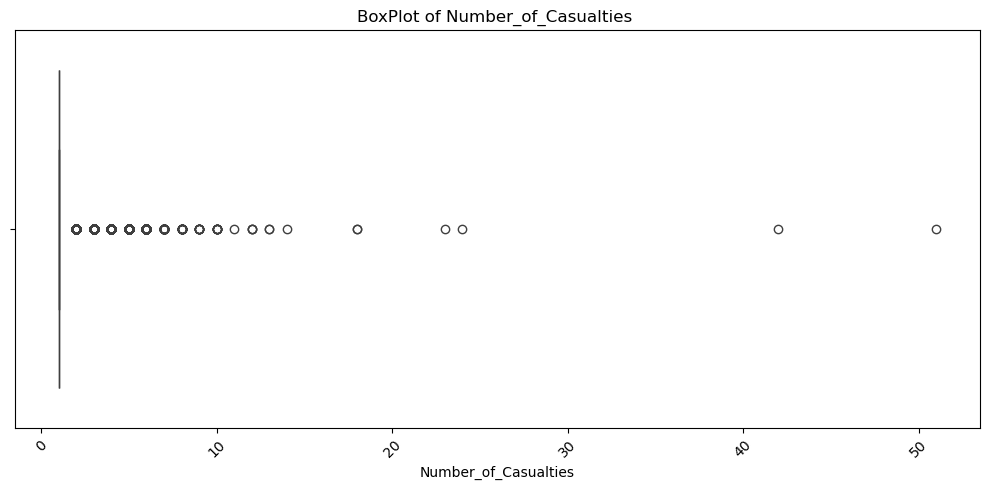

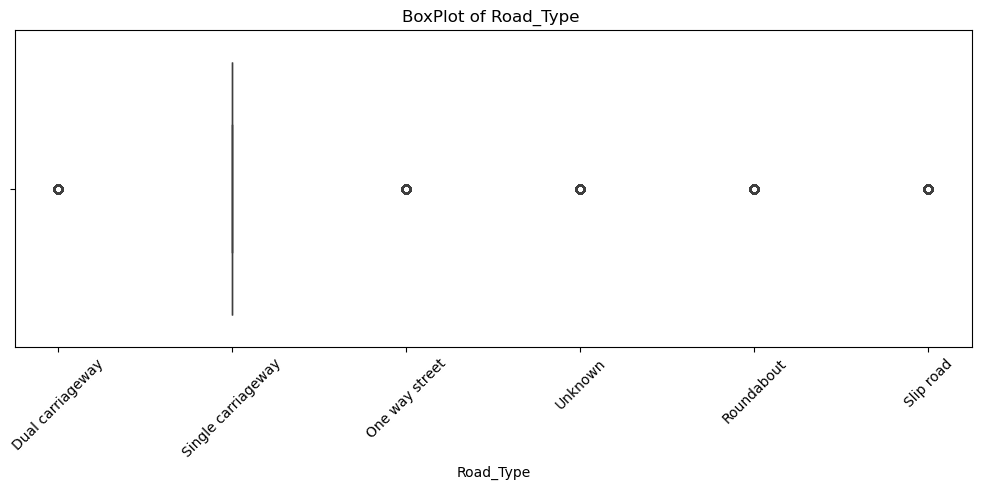

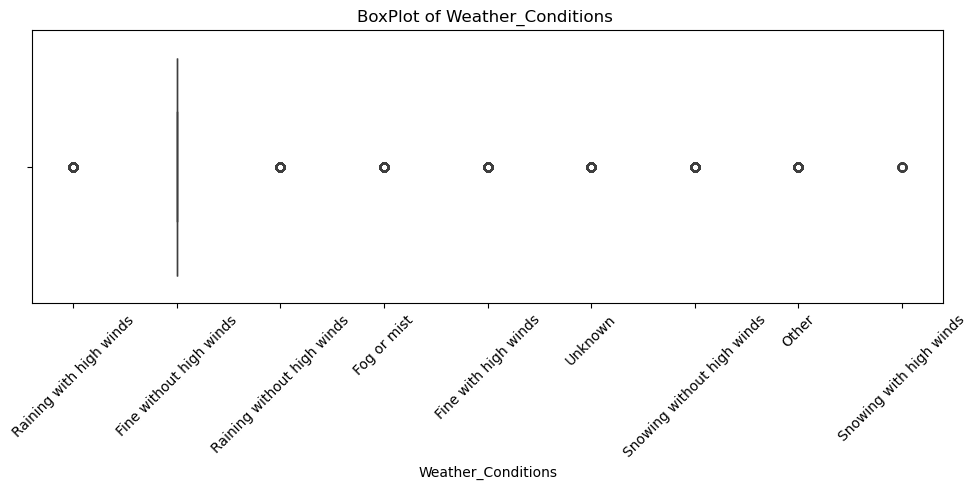

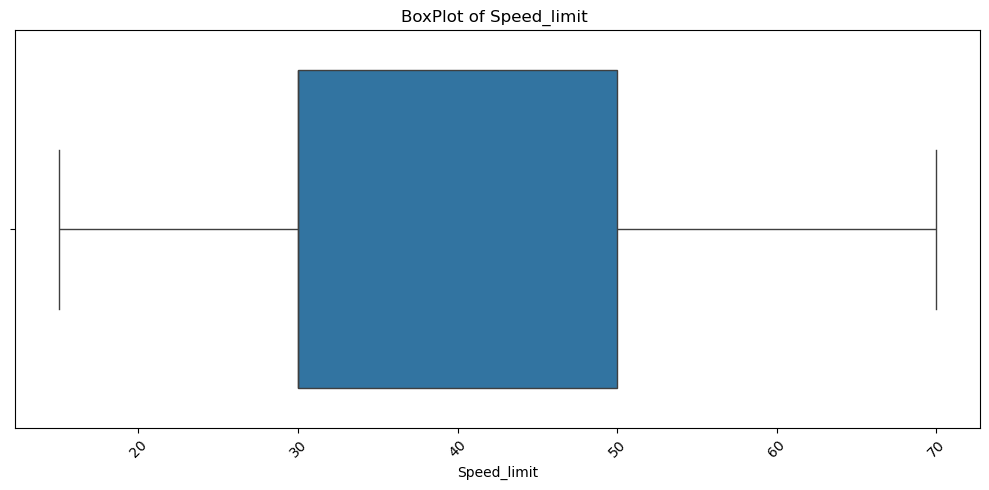

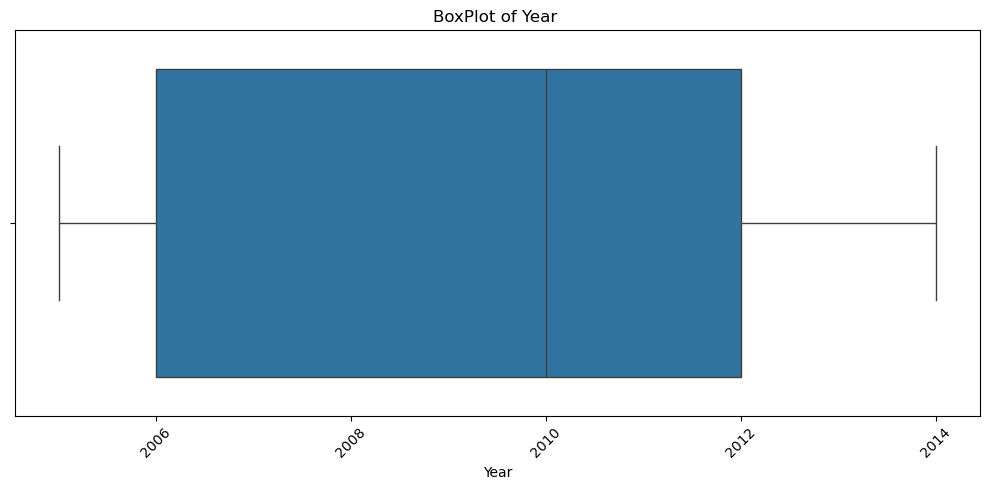

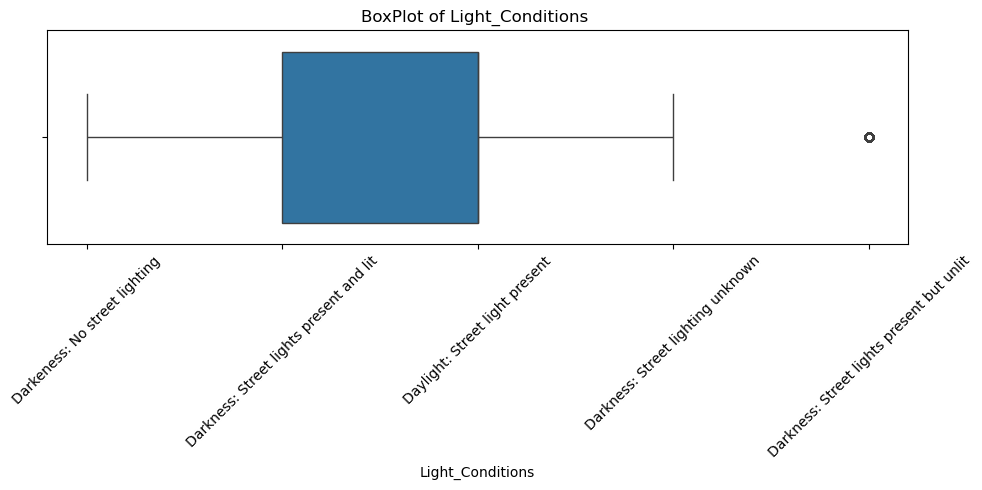

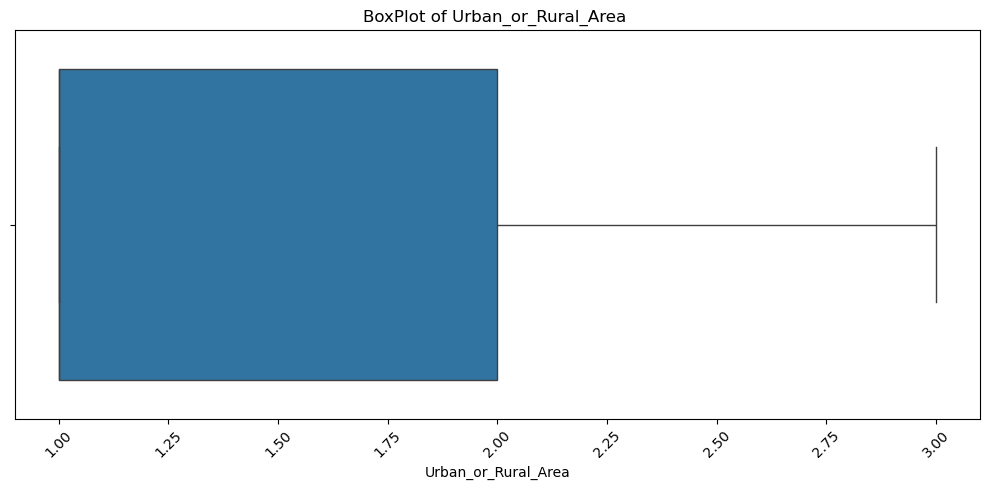

In [558]:
for col in features_df.columns:
    try:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=features_df[col])
        plt.title(f"BoxPlot of {col} ")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except TypeError as e:
        print("ERROR", e)

### fill the null values with the median.

In [559]:
col = {'Accident_Severity', 'Number_of_Casualties', 'Urban_or_Rural_Area'}

num_imputer = SimpleImputer(strategy='median')

features_df[list(col)] = num_imputer.fit_transform(features_df[list(col)])


/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_6716/431713363.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [560]:
num_imputer.statistics_

array([3., 1., 1.])

### fill with the most frequent.

In [561]:
features_df['Light_Conditions'].fillna(features_df['Light_Conditions'].mode()[0], inplace=True) 

/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_6716/523932214.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_6716/523932214.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [562]:
features_df.isnull().sum()

Accident_Severity       0
Longitude               0
Latitude                0
Number_of_Vehicles      0
Number_of_Casualties    0
Road_Type               0
Weather_Conditions      0
Speed_limit             0
Year                    0
Light_Conditions        0
Urban_or_Rural_Area     0
dtype: int64

In [563]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Accident_Severity     52000 non-null  float64
 1   Longitude             52000 non-null  float64
 2   Latitude              52000 non-null  float64
 3   Number_of_Vehicles    52000 non-null  int64  
 4   Number_of_Casualties  52000 non-null  float64
 5   Road_Type             52000 non-null  object 
 6   Weather_Conditions    52000 non-null  object 
 7   Speed_limit           52000 non-null  int64  
 8   Year                  52000 non-null  int64  
 9   Light_Conditions      52000 non-null  object 
 10  Urban_or_Rural_Area   52000 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 4.4+ MB


### encoding the categorical columns

In [564]:
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = one_hot_encoder.fit_transform(features_df[['Road_Type', 'Weather_Conditions', 'Light_Conditions']])
encoded_features_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out())

encoded_df = pd.concat([features_df.drop(columns=['Road_Type', 'Weather_Conditions', 'Light_Conditions']), encoded_features_df], axis=1)

In [565]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 25 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Accident_Severity                                           52000 non-null  float64
 1   Longitude                                                   52000 non-null  float64
 2   Latitude                                                    52000 non-null  float64
 3   Number_of_Vehicles                                          52000 non-null  int64  
 4   Number_of_Casualties                                        52000 non-null  float64
 5   Speed_limit                                                 52000 non-null  int64  
 6   Year                                                        52000 non-null  int64  
 7   Urban_or_Rural_Area                                         52000 non-null  float64
 

In [566]:
std_scaler = StandardScaler()
df_std_scaled = std_scaler.fit_transform(encoded_df)

min_max_scaler = MinMaxScaler()
df_min_max= min_max_scaler.fit_transform(encoded_df)

In [567]:
#df_cleaned = handle_outliers_zscore(features_df, threshold=5)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.



## I will choosse the following features here is way:
### 'longitude' and 'latitude' are the location of the accident
### 'Accident_Severity' is the most important feature
### 'Number_of_Vehicles' and 'Number_of_Casualties' directly affect the severity of the accident
### 'Road_Type' and 'Weather_Conditions', 'Road_Surface_Conditions' represent important data about the accident
### 'Time' also important to know the time of the accident
### 'Did_Police_Officer_Attend_Scene_of_Accident' is important to know if the police attended the accident

In [568]:
features_df.columns

Index(['Accident_Severity', 'Longitude', 'Latitude', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Road_Type', 'Weather_Conditions',
       'Speed_limit', 'Year', 'Light_Conditions', 'Urban_or_Rural_Area'],
      dtype='object')

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

### here is a two figures that shows the distribution of accidents in the map 

/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


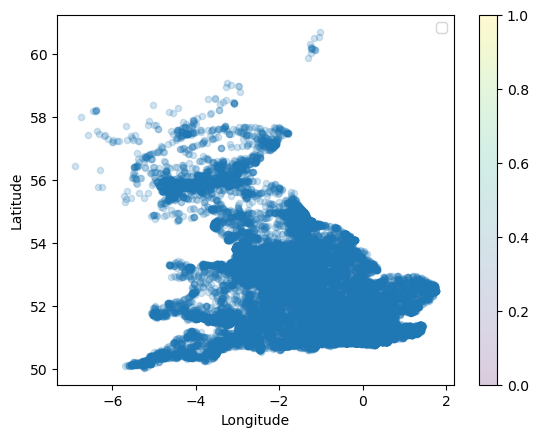

In [569]:
features_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2,cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [570]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Accident_Severity",
                            hover_name="Date", hover_data=["Number_of_Casualties"],
                            color_continuous_scale=px.colors.cyclical.IceFire, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

### plot of the number of accidents over time

<Axes: title={'center': 'Number of Accidents Over Time'}, xlabel='Month'>

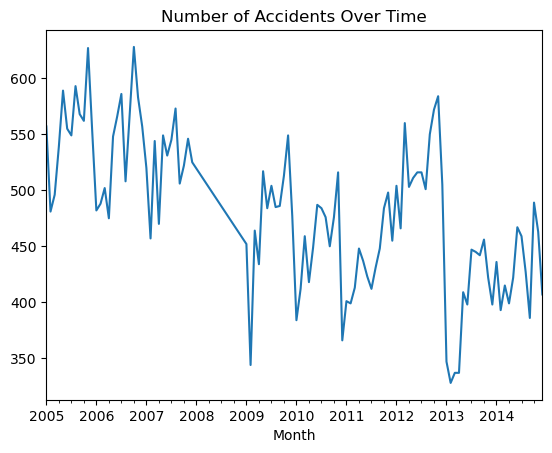

In [571]:
tr_df['Month'] = tr_df['Date'].dt.to_period('M')
accidents_by_month = tr_df.groupby('Month').size()
accidents_by_month.plot(kind='line', title='Number of Accidents Over Time')

### Accident Severity by Road Type

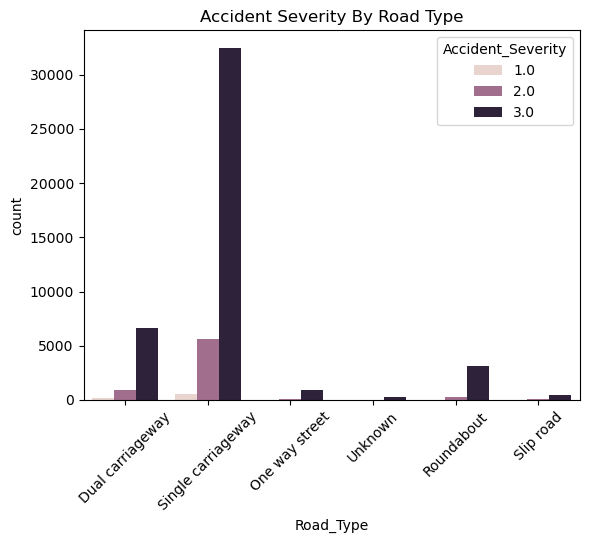

In [572]:
sns.countplot(data=tr_df, x='Road_Type', hue='Accident_Severity')
plt.title("Accident Severity By Road Type")
plt.xticks(rotation=45)
plt.show()

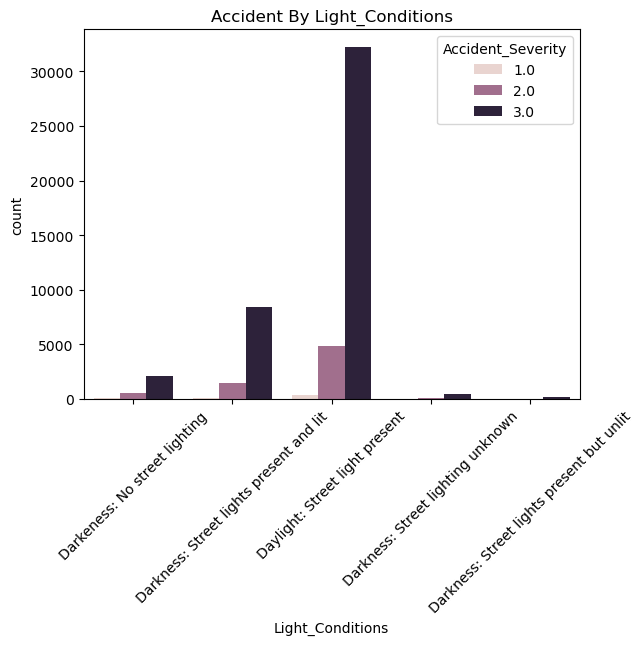

In [573]:
sns.countplot(data=tr_df, x='Light_Conditions', hue='Accident_Severity')
plt.title("Accident By Light_Conditions")
plt.xticks(rotation=45)
plt.show()
### accident severity by light conditions

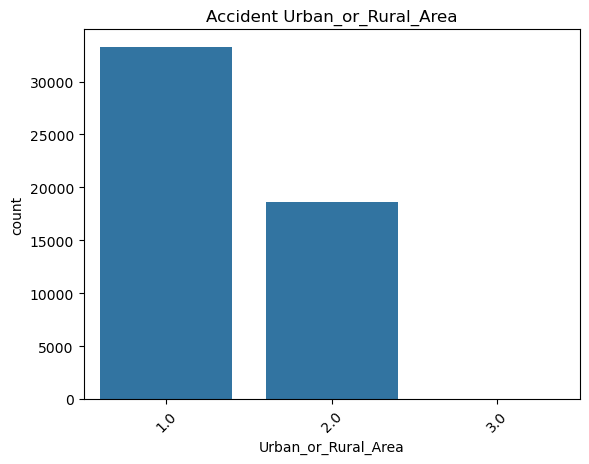

In [574]:
sns.countplot(data=tr_df, x='Urban_or_Rural_Area')
plt.title("Accident Urban_or_Rural_Area")
plt.xticks(rotation=45)
plt.show()

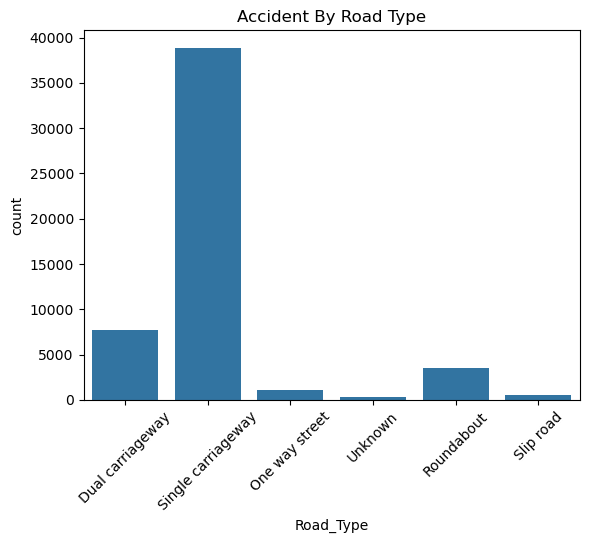

In [575]:
sns.countplot(data=tr_df, x='Road_Type')
plt.title("Accident By Road Type")
plt.xticks(rotation=45)
plt.show()

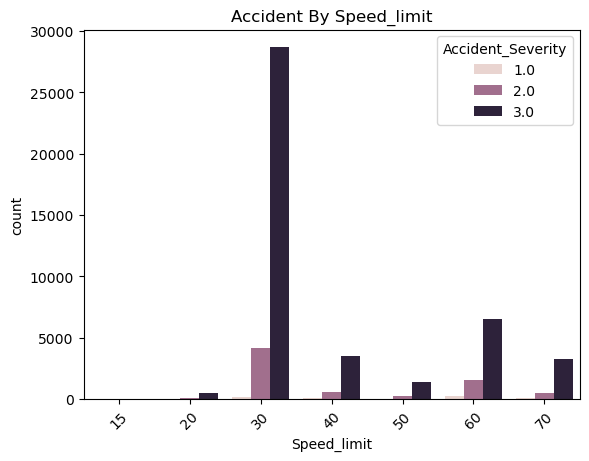

In [576]:

sns.countplot(data=tr_df, x='Speed_limit', hue='Accident_Severity')
plt.title("Accident By Speed_limit")
plt.xticks(rotation=45)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [577]:
pca= PCA(n_components=2, random_state=23)
X_pca = pca.fit_transform(df_std_scaled)

In [578]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_6716/389387425.py:2: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



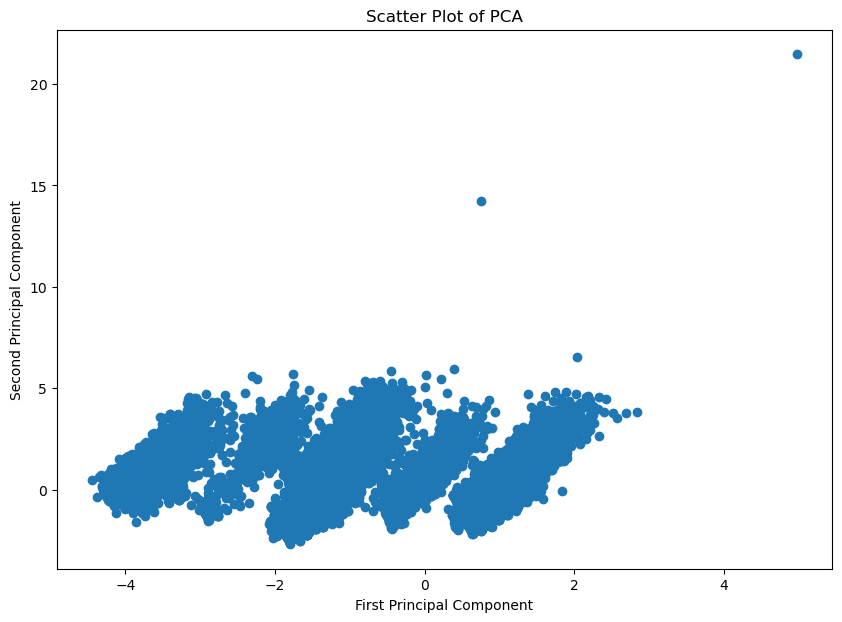

In [579]:
plt.figure(figsize=(10,7))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of PCA')
plt.show()

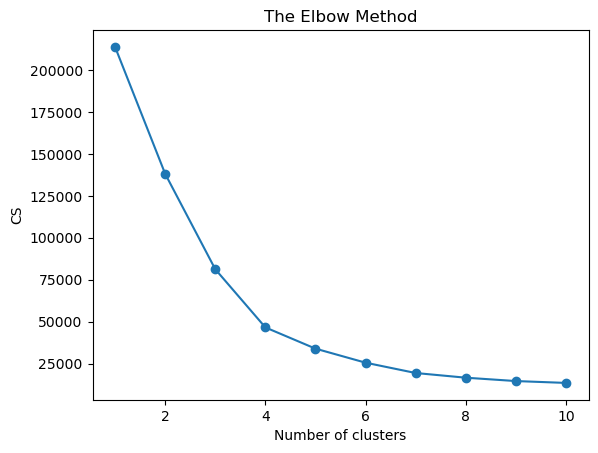

In [580]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 7)
    kmeans.fit(pca_df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

## Evaluation
Evaluate the clustering result using appropriate metrics.

In [581]:
score = silhouette_score(pca_df, kmeans.labels_, metric='euclidean')

In [582]:
print(f'Silhouette Score: {score * 100:.2f}%')

Silhouette Score: 47.08%


## Plot the data points with their predicted cluster center

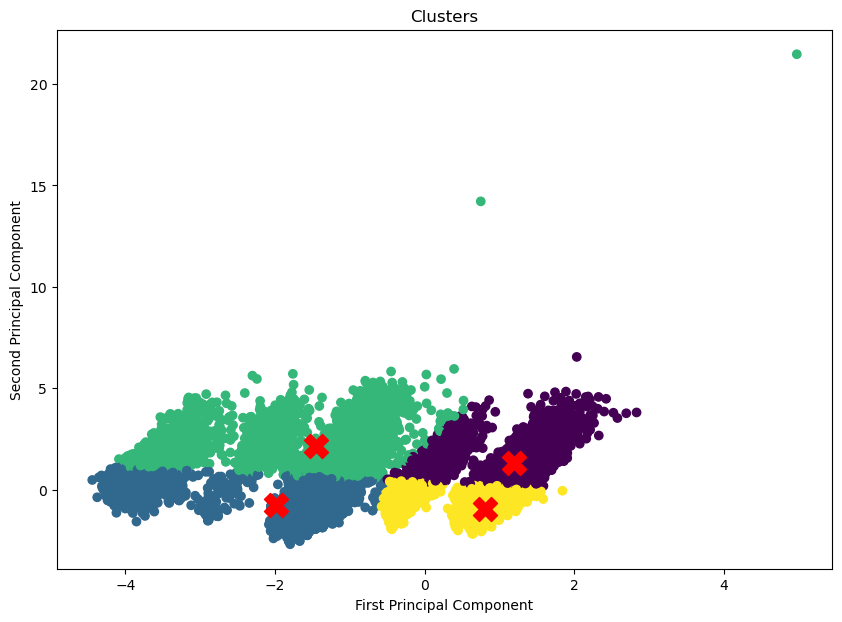

In [602]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(pca_df)
y_kmeans = kmeans.predict(pca_df)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

#visulaizing the clusters 

plt.figure(figsize=(10,7))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=y_kmeans, cmap='viridis')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=300, c='red', marker='X')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Clusters')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?